# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.856335e+01     1.655378e+01
 * time: 0.0019199848175048828
     1     3.587831e+01     1.353520e+01
 * time: 0.007982969284057617
     2     3.347367e+01     1.037763e+01
 * time: 0.014451026916503906
     3     2.898229e+01     6.836883e+00
 * time: 0.021264076232910156
     4     2.303142e+01     4.808191e+00
 * time: 0.02752995491027832
     5     2.026609e+01     2.066459e+00
 * time: 0.032772064208984375
     6     1.971502e+01     2.461886e+00
 * time: 0.037754058837890625
     7     1.960354e+01     2.507141e+00
 * time: 0.07463788986206055
     8     1.881386e+01     1.856791e+00
 * time: 0.0788419246673584
     9     1.855640e+01     2.637864e+00
 * time: 0.08305501937866211
    10     1.826021e+01     1.713540e+00
 * time: 0.08713889122009277
    11     1.783913e+01     1.144322e+00
 * time: 0.09138607978820801
    12     1.775192e+01     2.327683e+00
 * time: 0.09480500221252441
    13     1.754743e+01     1.520206e+00
 *

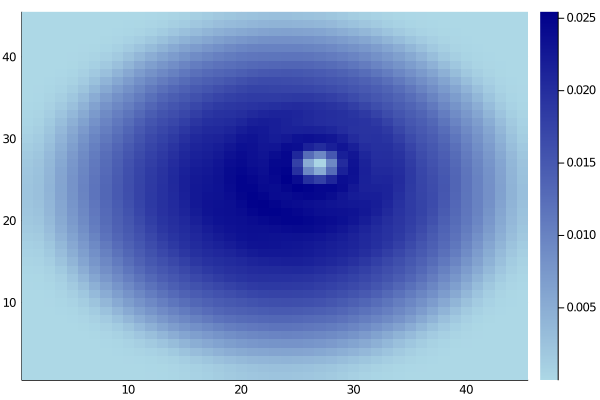

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)